In [1]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
df  = pd.read_csv('../../ML/csv files/USArrests.csv', index_col = 0)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4).fit(df)
labels = kmeans.labels_
df['cluster_id'] = labels
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [4]:
R = df.to_numpy()
R

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   2. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

In [5]:
R_cov = np.cov(R, rowvar=False)

# print the covariance matrix
import pandas as pd
iris_covmat = pd.DataFrame(data=R_cov, columns=df.columns)
iris_covmat.index = df.columns
iris_covmat

,Murder,Assault,UrbanPop,Rape,cluster_id
Murder,18.970465,291.062367,4.386204,22.991412,-2.006286
Assault,291.062367,6945.165714,312.275102,519.269061,-46.595102
UrbanPop,4.386204,312.275102,209.518776,55.768082,-3.808980
Rape,22.991412,519.269061,55.768082,87.729159,-4.061469
cluster_id,-2.006286,-46.595102,-3.808980,-4.061469,1.201633


In [6]:
# numpy linear algebra module eig() api
# Compute the eigenvalues and eigenvectors of a square array
eig_values, eig_vectors = np.linalg.eig(R_cov)

# print values and corresponding vectors
print(eig_values)
eig_vectors

[7.01142913e+03 2.02006874e+02 4.21136616e+01 6.16651385e+00
 8.69568414e-01]


array([[-0.04170343, -0.04481689, -0.07990567,  0.99470166,  0.02087976],
       [-0.99519886, -0.05881709,  0.06759957, -0.03904939,  0.0050227 ],
       [-0.04633631,  0.97681764,  0.20059616,  0.05799754,  0.00881547],
       [-0.07515434,  0.20071665, -0.97405444, -0.07247066,  0.00553198],
       [ 0.00669547, -0.0084927 ,  0.00495039, -0.02068926,  0.99971521]])

In [7]:
# pick 2 eigenvectors whose eigenvalues are highest
featureVector = eig_vectors[:,:4]
featureVector

array([[-0.04170343, -0.04481689, -0.07990567,  0.99470166],
       [-0.99519886, -0.05881709,  0.06759957, -0.03904939],
       [-0.04633631,  0.97681764,  0.20059616,  0.05799754],
       [-0.07515434,  0.20071665, -0.97405444, -0.07247066],
       [ 0.00669547, -0.0084927 ,  0.00495039, -0.02068926]])

In [24]:
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape
df2 = pd.DataFrame(newDataset,columns=['PC1', 'PC2','PC3','PC4'])
y = pd.Series(df.cluster_id)
df2['Target'] = y.values 
df2

,PC1,PC2,PC3,PC4,Target
0,-239.691498,46.429707,5.888317,5.721197,1
1,-267.716149,39.893581,-16.732226,-0.784723,1
2,-298.956256,66.703893,5.083993,-1.050912,1
3,-193.237098,41.185221,3.176495,2.820691,0
4,-282.311391,80.394139,-3.349079,0.489463,1
5,-209.872729,71.606770,-8.890349,1.611262,0
6,-113.991519,70.799659,11.821015,2.586402,3
7,-241.620336,59.230813,14.675068,-0.414917,1
8,-340.131483,64.145874,6.395615,4.544161,1
9,-215.431759,50.597328,-0.221684,10.678498,0


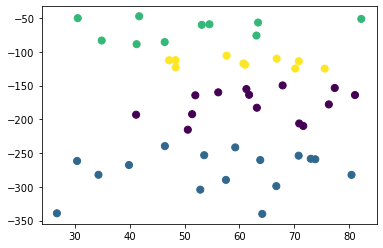

In [23]:
import seaborn as sns
import pandas as pd
%matplotlib inline

# plot 2D data
plt.scatter(df2.iloc[:,1],df2.iloc[:,0], c = df2.Target, s = 50, cmap = "viridis")